# 대선자료 시각화


In [101]:
# 모듈 불러오기
import pandas as pd

In [102]:
election = pd.read_csv('../data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [103]:
# 기본 통계량 확인하기 : 개수, 평균, 표준편차, 1~4 사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [104]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [105]:
# dimension 확인하기
election.shape

(248, 7)

In [106]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [107]:
# 전체컬럼에 대해 NaN 확인
# election.isna().sum()
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

---
# 혁도의 부재

In [108]:
election['electionSum'] = election[['이재명','윤석열','심상정']].sum(axis=1)
# election.iloc[:, 4:7].sum(axis=1)
# election.loc[:,'이재명':'심상정']
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [109]:
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [110]:
# csv로 저장하기
election.to_csv('../data/election_sum_ratio.csv', index=False)

In [111]:
pd.read_csv('../data/election_sum_ratio.csv')

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


---
### 광역시별 투표율을 Pie Chart로 표현하기

In [112]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [113]:
df = pd.read_csv('../data/election_sum_ratio.csv', index_col='광역시도')
df

,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,,
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...
경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
경상남도,합천군,39768,31270,6911,22742,511,30164,96.46


In [114]:
# groupby
df2 = df.groupby('광역시도').sum()
df2

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
강원도,1333621,1015458,419644,544980,25031,989655,1750.17
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
광주광역시,1209206,985492,830058,124511,14865,969434,492.02
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
대전광역시,1233177,945308,434950,464060,25445,924455,488.67
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06


In [115]:
# sort : descending

df3 = df2.sort_values('투표수', ascending=False)
df3

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
인천광역시,2519225,1883504,913320,878560,51852,1843732,976.71
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
충청남도,1796474,1324660,589991,670283,31789,1292063,1560.70
전라남도,1581278,1282168,1094872,145549,16279,1256700,2152.66


In [116]:
df4 = df3.iloc[:5].append(df3.iloc[5:].sum(), ignore_index=True)

In [117]:
df4.index = ['경기도','서울특별시','부산광역시','경상남도','인천광역시','기타']
df4.sort_values('투표수', ascending=False)
df4

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,11106036.0,8518854.0,4297931.0,3859666.0,201113.0,8358710.0,4018.96
서울특별시,8346647.0,6501831.0,2944981.0,3255747.0,180324.0,6381052.0,2453.06
부산광역시,2921510.0,2200224.0,831896.0,1270072.0,47541.0,2149509.0,1562.69
경상남도,2809907.0,2146882.0,794130.0,1237346.0,52591.0,2084067.0,2132.21
인천광역시,2519225.0,1883504.0,913320.0,878560.0,51852.0,1843732.0,976.71
기타,16086169.0,12513369.0,6208560.0,5759049.0,264031.0,12231640.0,13079.79


In [118]:
data = df4['투표수']
categories = list(df4.index)

In [119]:
# plt.style.use('default')

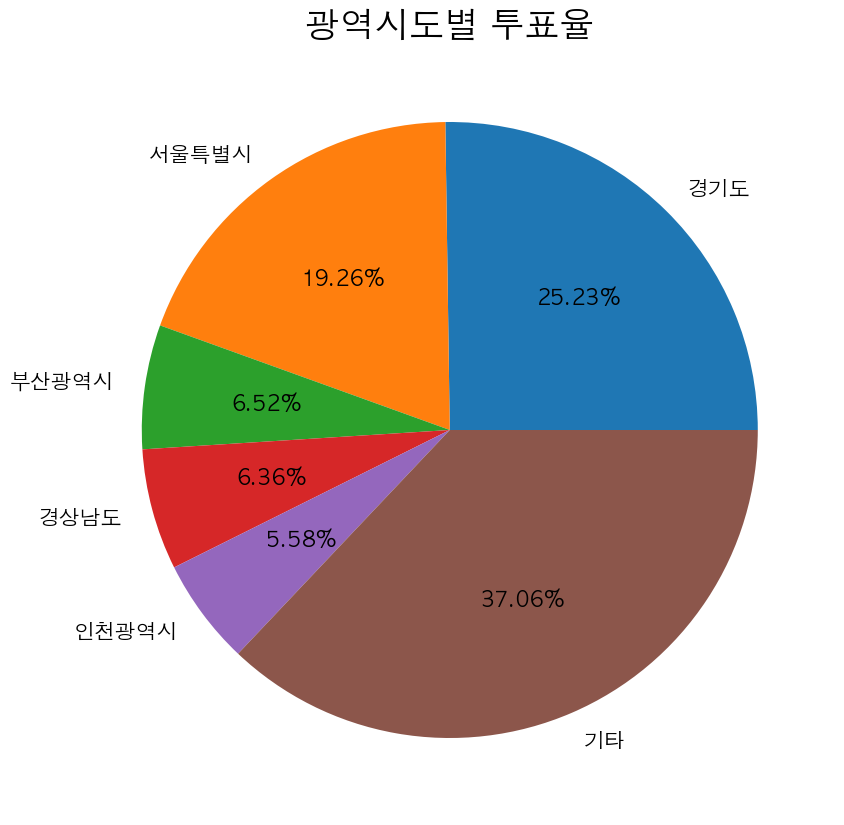

In [120]:
plt.pie(
    data,
    labels = categories,
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    # textprops={'size': 15}
)
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 15
plt.ylabel('')
plt.title('광역시도별 투표율', size=25)

plt.show()

---
### 윤석열 후보 득표율 pie chart

In [121]:
df5 = df3.sort_values('윤석열', ascending=False)
df5

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
인천광역시,2519225,1883504,913320,878560,51852,1843732,976.71
충청남도,1796474,1324660,589991,670283,31789,1292063,1560.70
강원도,1333621,1015458,419644,544980,25031,989655,1750.17


In [122]:
data = df5['윤석열']
categories = list(df5.index)

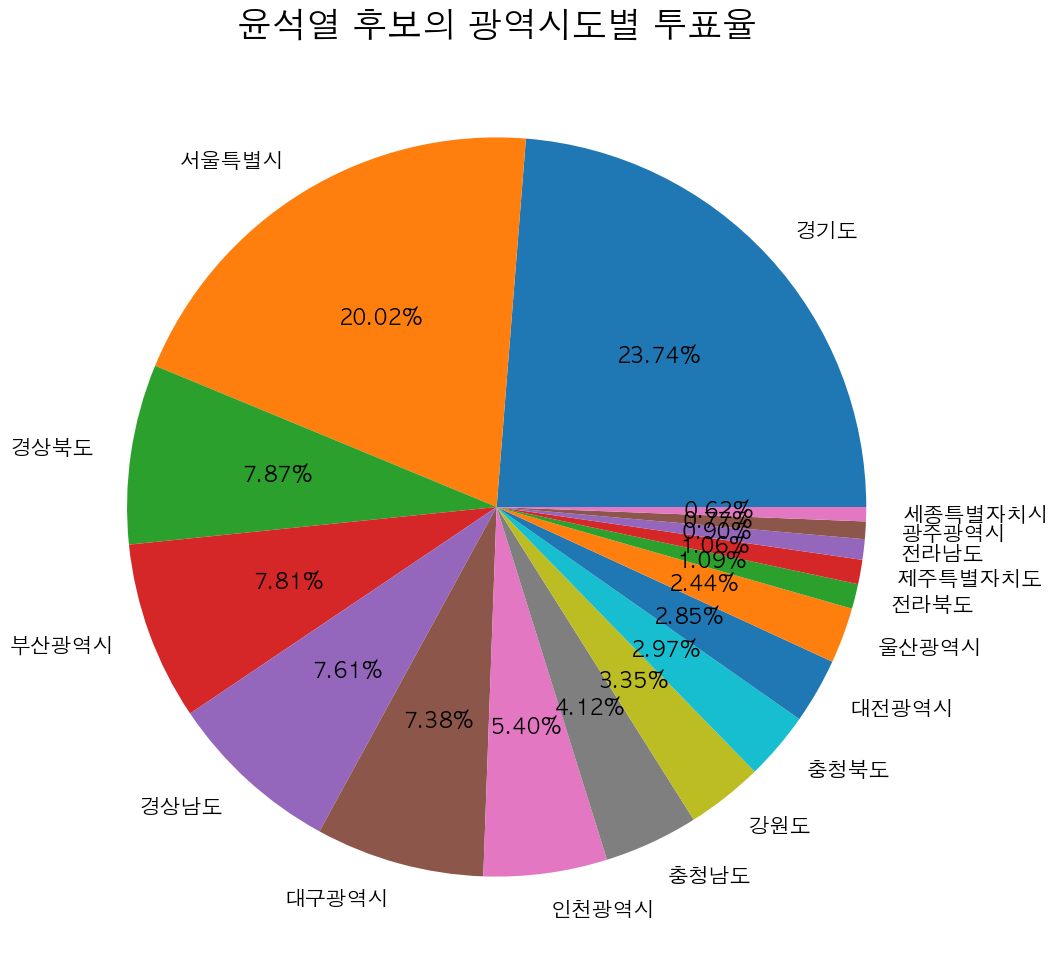

In [123]:
plt.pie(
    data,
    labels = categories,
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    # textprops={'size': 15}
)
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 15
plt.ylabel('')
plt.title('윤석열 후보의 광역시도별 투표율', size=25)

plt.show()

---
### 이재명

In [124]:
df6 = df.pivot_table('이재명', index='광역시도', aggfunc=sum)
df6.sort_values('이재명', ascending=False, inplace=True)

In [125]:
df6

,이재명
광역시도,
경기도,4297931
서울특별시,2944981
전라남도,1094872
전라북도,1016863
인천광역시,913320
부산광역시,831896
광주광역시,830058
경상남도,794130
충청남도,589991


In [126]:
df6.columns[0]

'이재명'

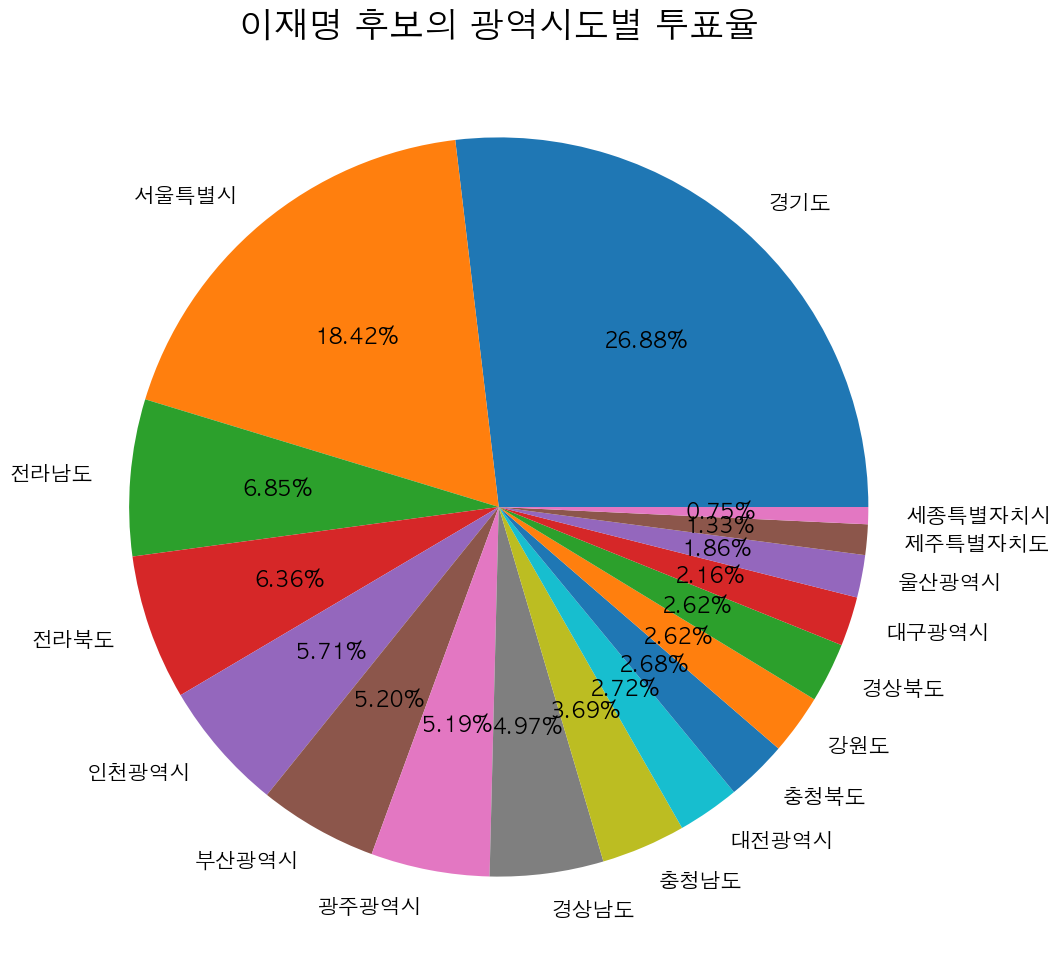

In [127]:
data = df6['이재명']
categories = list(df6.index)

plt.pie(
    data,
    labels = categories,
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    # textprops={'size': 15}
)
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 15
plt.ylabel('')
plt.title(f'{df6.columns[0]} 후보의 광역시도별 투표율', size=25)

plt.show()

> for문 돌리기 시도해보자

### 윤석열 후보의 서울 득표 top 5

In [128]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [129]:
df = election.loc[election.광역시도=='서울특별시',['시군구','윤석열']]
df = df.sort_values('윤석열',ascending=False)
df = df.set_index('시군구')
df

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593
관악구,151944
양천구,149780
은평구,140666


In [130]:
df1 = df.iloc[:5].append(df.iloc[5:].sum(), ignore_index=True)
df1.index = ['송파구','강남구','강서구','서초구','노원구','기타']
df1

,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
기타,2240362


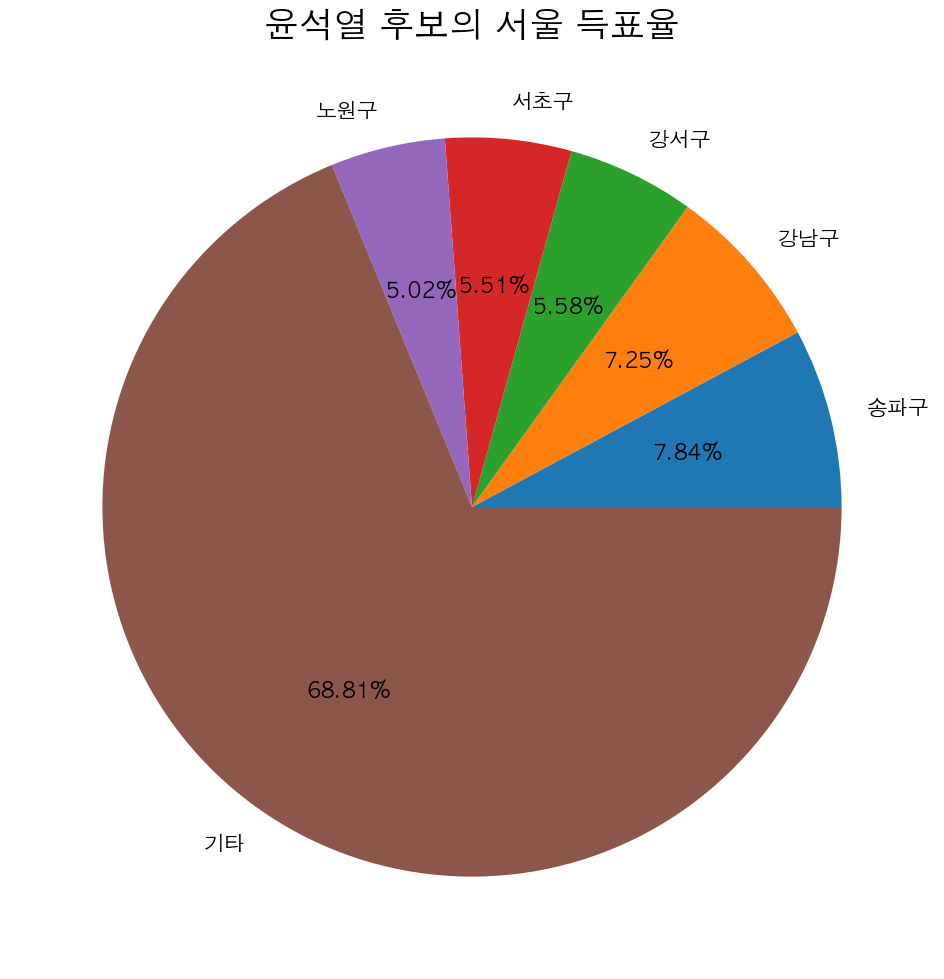

In [131]:
data = df1['윤석열']
categories = list(df1.index)

plt.pie(
    data,
    labels = categories,
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    # textprops={'size': 15}
)
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 15
plt.ylabel('')
plt.title(f'{df1.columns[0]} 후보의 서울 득표율', size=25)

plt.show()

---
# 혁도의 부재

### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [132]:
election[election.광역시도=='서울특별시']

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
5,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.01
6,서울특별시,중랑구,347108,260862,130381,118201,6899,255481,97.94
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12
8,서울특별시,강북구,268974,199448,103333,86540,5245,195118,97.83
9,서울특별시,도봉구,281812,216036,106546,99780,5605,211931,98.10


In [142]:
성북구 = election[election.시군구=='성북구']
성북구

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [141]:
# 강사님 스타일
# 성북구 = pd.Series([int(성북구['윤석열']),int(성북구['이재명']),int(성북구['심상정'])]).append(성북구['투표수'] - 성북구['electionSum']).reset_index(drop=True)
# 성북구

0    135044
1    142702
2      8952
3      5489
dtype: int64

In [143]:
df = election.loc[election.시군구=='성북구',['윤석열','이재명','심상정']]
df

,윤석열,이재명,심상정
7,135044,142702,8952


In [144]:
df['기타'] = 성북구.투표수 - 성북구.electionSum
df.index = ['성북구']

In [145]:
df = df[['윤석열','이재명','심상정','기타']].T

In [146]:
df

,성북구
윤석열,135044
이재명,142702
심상정,8952
기타,5489


In [138]:
# df1 = df.sort_values('성북구', ascending=False)
# df1
# 윤석열이 주인공이니깐 정렬 없이 진행

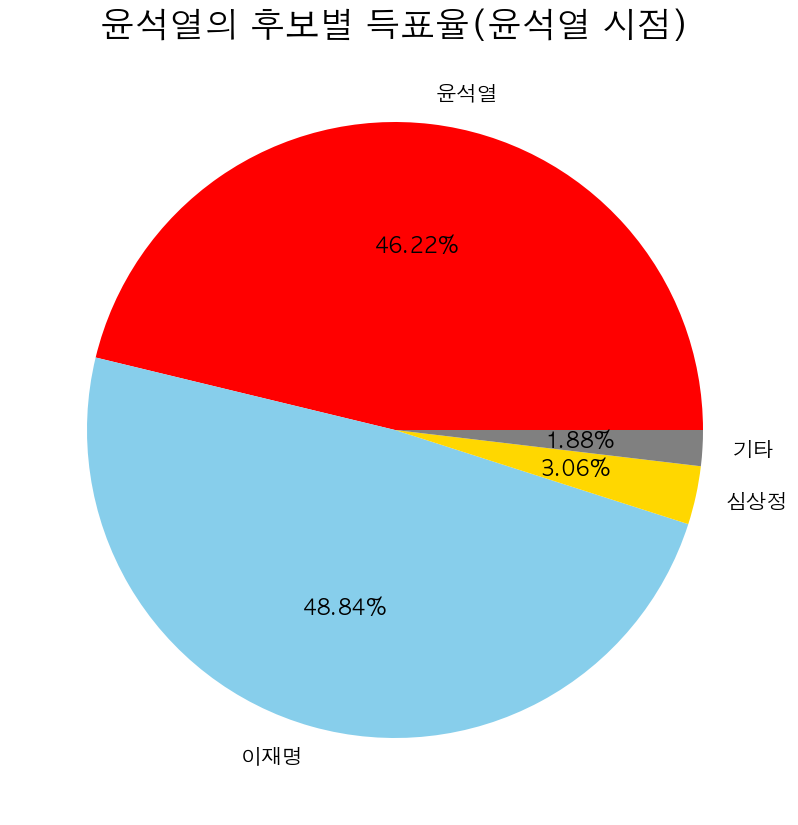

In [147]:
data = df['성북구']
categories = list(df.index)

plt.pie(
    data,
    labels = categories,
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    colors=['red','skyblue','gold','grey']    
)

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 15
plt.ylabel('')
plt.title(f'{df1.columns[0]}의 후보별 득표율(윤석열 시점)', size=25)

plt.show()

---
### 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [153]:
election.groupby('광역시도').sum()

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
강원도,1333621,1015458,419644,544980,25031,989655,1750.17
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
광주광역시,1209206,985492,830058,124511,14865,969434,492.02
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
대전광역시,1233177,945308,434950,464060,25445,924455,488.67
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06


In [155]:
election.groupby('광역시도').sum().sort_values('투표수', ascending=False)

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
광역시도,,,,,,,
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21
인천광역시,2519225,1883504,913320,878560,51852,1843732,976.71
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81
충청남도,1796474,1324660,589991,670283,31789,1292063,1560.70
전라남도,1581278,1282168,1094872,145549,16279,1256700,2152.66


In [217]:
df = election.groupby('광역시도').sum().sort_values('투표수', ascending=False)[['윤석열','이재명','심상정']].head(4)
df1 = df / 1000 # 단위 천 명
df1

,윤석열,이재명,심상정
광역시도,,,
경기도,3859.666,4297.931,201.113
서울특별시,3255.747,2944.981,180.324
부산광역시,1270.072,831.896,47.541
경상남도,1237.346,794.130,52.591


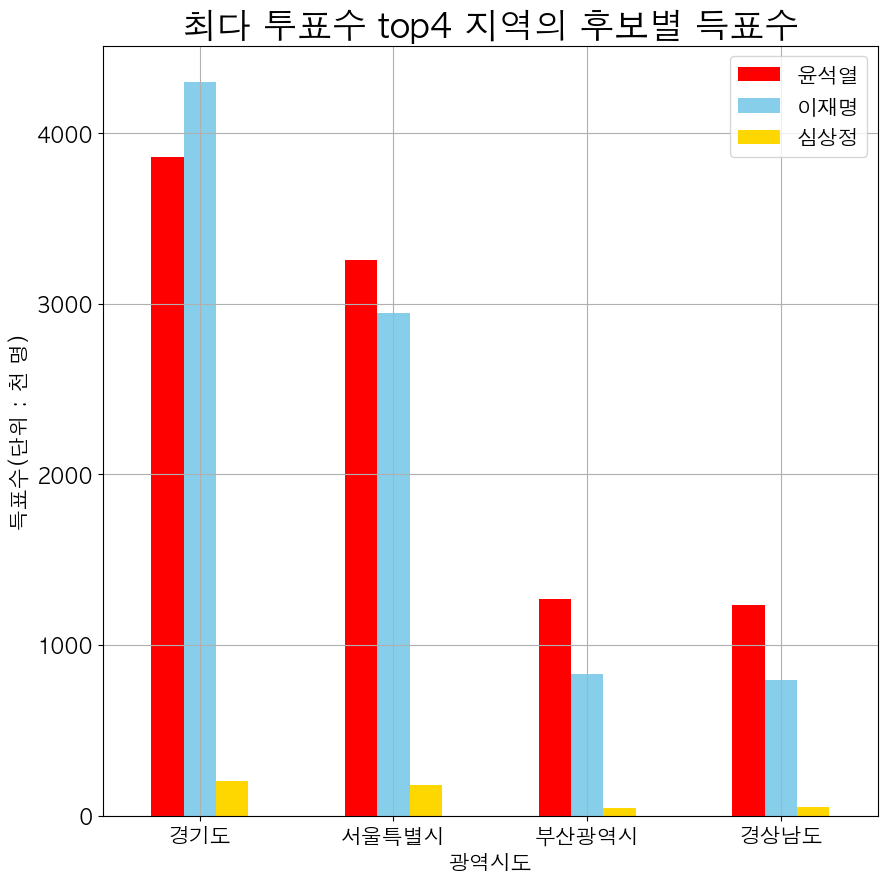

In [220]:
df1.plot(
    kind='bar',
    # ylim=(0,4500000),
    color=['red','skyblue','gold'],
)
plt.title('최다 투표수 top4 지역의 후보별 득표수', size=25)
plt.ylabel('득표수(단위 : 천 명)')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain') # 지수표현 없애기
plt.xticks(rotation=0)
plt.grid()

plt.show()

---
### 최다 투표수 top5 시군구의 후보별 득표수

In [246]:
df = election.sort_values('투표수', ascending=False).head(5)
df

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
100,경기도,화성시,703896,542027,283324,236055,12955,532334,98.21
85,경기도,부천시,699678,532995,285227,224331,13249,522807,98.09
98,경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22
23,서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.41
15,서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04


In [249]:
# index 만들어주기
df.index = df.광역시도 +' '+ df.시군구

In [258]:
df1 = df[['윤석열','이재명','심상정']] / 1000
df1

,윤석열,이재명,심상정
경기도 화성시,236.055,283.324,12.955
경기도 부천시,224.331,285.227,13.249
경기도 남양주시,203.075,239.179,10.089
서울특별시 송파구,255.166,180.490,10.652
서울특별시 강서구,181.510,190.000,11.100


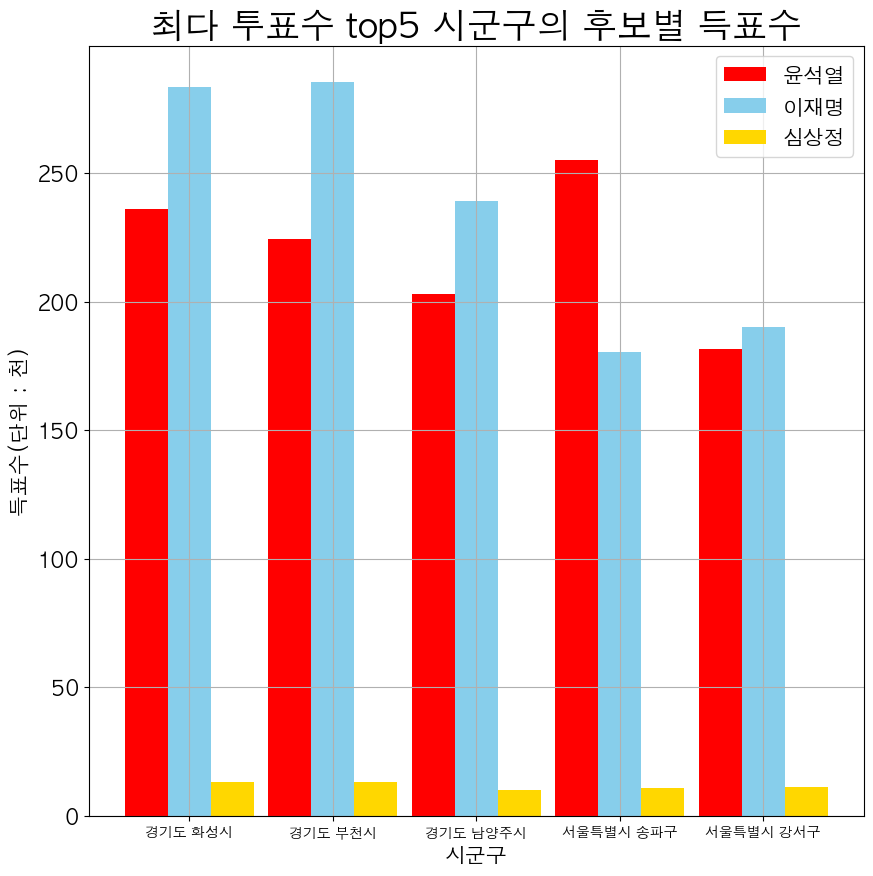

In [264]:
df1.plot(
    kind='bar',
    color=['red','skyblue','gold'],
    width=0.9,
)
plt.title('최다 투표수 top5 시군구의 후보별 득표수', size=25)
plt.xlabel('시군구')
plt.ylabel('득표수(단위 : 천)')

plt.xticks(rotation=0, size=10)
plt.grid()

plt.show()